In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer, LabelEncoder as LE, StandardScaler as SS
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression as LoR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_csv('datasets/Project_11_Census_Income.csv')

In [3]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
data.head(20)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [5]:
data.shape

(32561, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

#No null values are present in dataset

From the observation there are no null values are present in dataset, but there are '?' values are present. Encoding '?' values to NaN.

In [8]:
# This Code will Count the occuring of the '?' in all the columns
for i in data.columns:
    t = data[i].value_counts()
    index = list(t.index)
    print ("The Value Counts of ? in", i)
    for i in index:
        temp = 0
        if i == '?':
            print (t['?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

The Value Counts of ? in age
0
The Value Counts of ? in workclass
1836
The Value Counts of ? in fnlwgt
0
The Value Counts of ? in education
0
The Value Counts of ? in education.num
0
The Value Counts of ? in marital.status
0
The Value Counts of ? in occupation
1843
The Value Counts of ? in relationship
0
The Value Counts of ? in race
0
The Value Counts of ? in sex
0
The Value Counts of ? in capital.gain
0
The Value Counts of ? in capital.loss
0
The Value Counts of ? in hours.per.week
0
The Value Counts of ? in native.country
583
The Value Counts of ? in income
0


In [9]:
data[data == '?'] = np.nan

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From the above information, now we can see 'workclass', 'occupation' and 'native.country' is having missing values. Filling those missing values with most frequent vlaues(mode) by using Imputer

In [11]:
misslist = ['workclass','occupation','native.country']
for col in misslist:
    data[col].fillna(data[col].mode()[0],inplace=True)        

In [12]:
#Checking again for data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


No missing values in dataset now.

In [13]:
#Checking value count for target column

data.income.nunique()

2

In [14]:
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

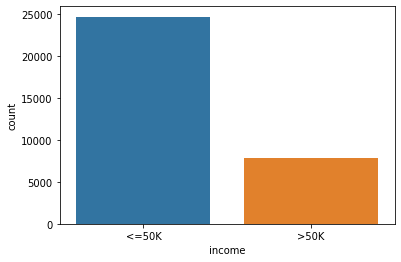

In [15]:
sns.countplot(data['income'])
plt.show()

We can see, most of the people having income below 50K

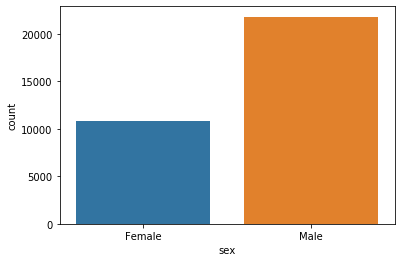

In [16]:
sns.countplot(data['sex'])
plt.show()

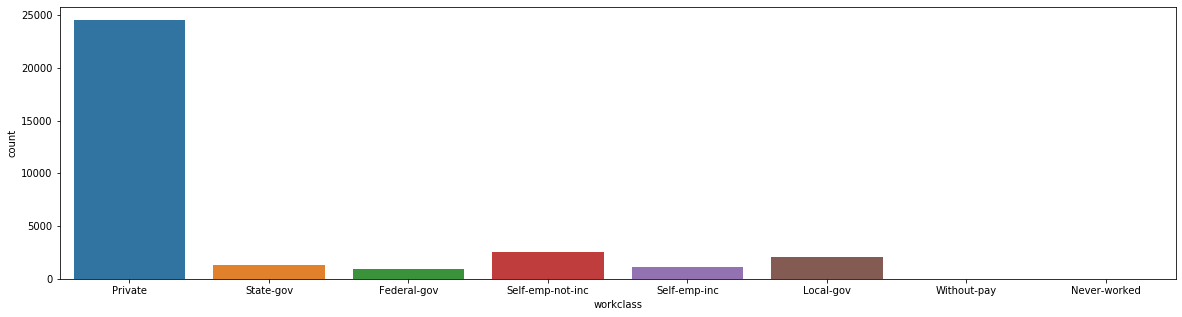

In [17]:
# Workclass
plt.figure(figsize=(20,5))
sns.countplot(data['workclass'])
plt.show()

In [18]:
data.workclass.value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [19]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
data['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
data['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

data['workclass'].value_counts()

Private           24532
Govt_employees     4351
Self_employed      3657
Without-pay          14
Never-worked          7
Name: workclass, dtype: int64

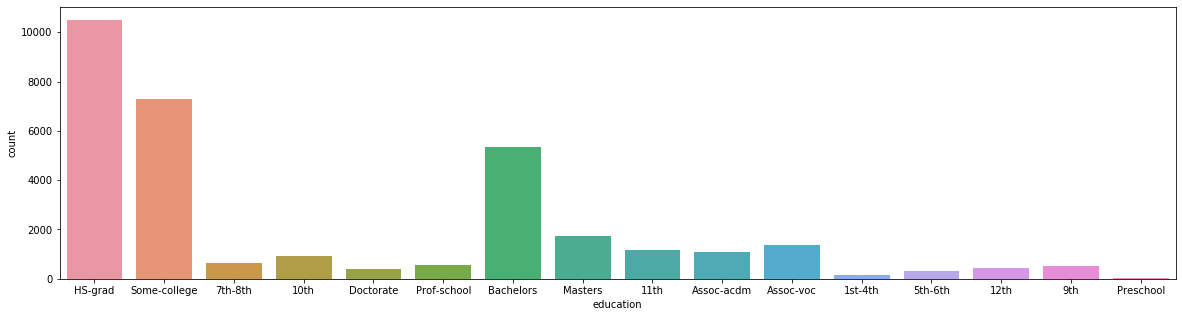

In [20]:
# Workclass
plt.figure(figsize=(20,5))
sns.countplot(data['education'])
plt.show()

In [21]:
data.education.nunique()

16

In [22]:
data.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

#In education col, we can combine 1st-4th, 5th-6th, 7th-8th as elementary group and 9th, 10th, 'HS-grad','11th','12th' as graduate group

In [23]:
graduate = ['9th','10th','11th','12th','HS-grad']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
data['education'].replace(to_replace = graduate,value = 'Graduate',inplace = True)
data['education'].replace(to_replace = elementary,value = 'Elementary',inplace = True)

data['education'].value_counts()

Graduate        13556
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
Elementary       1147
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Preschool          51
Name: education, dtype: int64

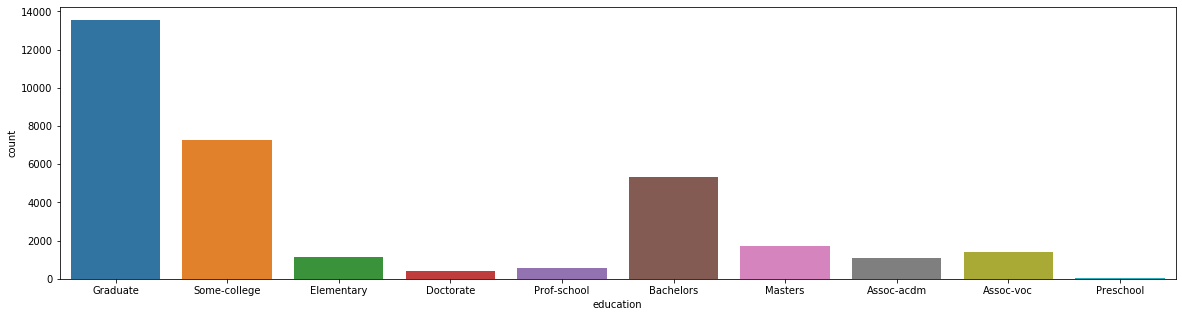

In [24]:
# Workclass
plt.figure(figsize=(20,5))
sns.countplot(data['education'])
plt.show()

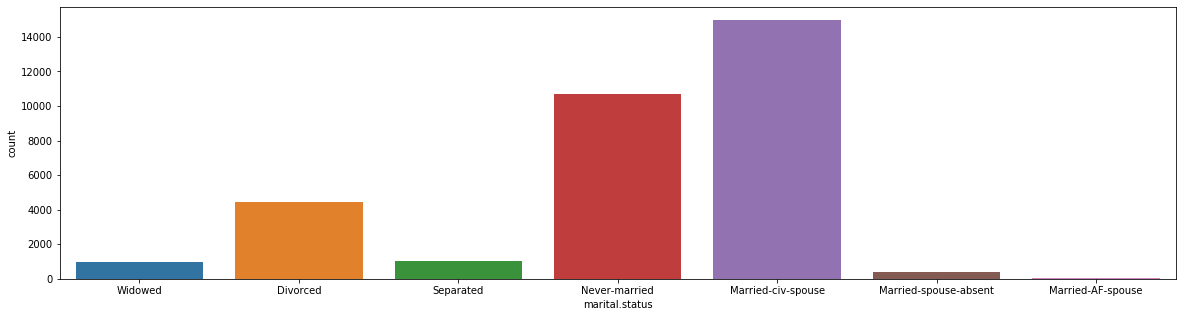

In [25]:
#marital.status
plt.figure(figsize=(20,5))
sns.countplot(data['marital.status'])
plt.show()



In [26]:
data['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

We can merge Married-civ-spouse, Married-spouse-absent, Married-AF-spouse as Married.

Also Divorced and Separated as Separated

In [27]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
data['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
data['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

data['marital.status'].value_counts()

Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital.status, dtype: int64

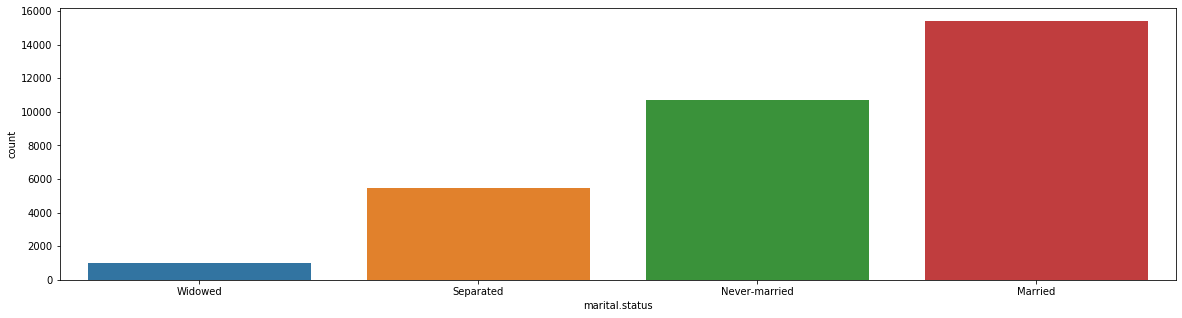

In [28]:
#marital.status
plt.figure(figsize=(20,5))
sns.countplot(data['marital.status'])
plt.show()



In [29]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,Graduate,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,Graduate,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,Elementary,4,Separated,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,Graduate,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,Graduate,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [30]:
data['native.country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

#### Checking for Relation with income

In [31]:
#Encoding income with 0 and 1

data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}) 

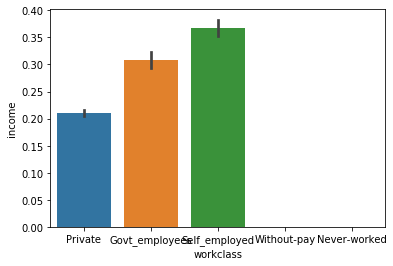

In [32]:
#Plotting workclass with income

sns.barplot(x='workclass',y='income',data=data)

As we can see, self employed is highly correlated with income.

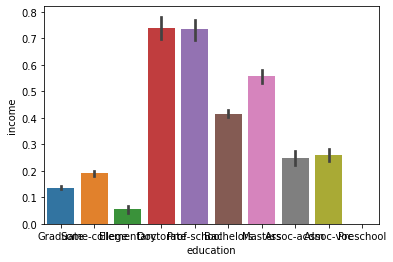

In [33]:
#Plotting education with income

sns.barplot(x='education',y='income',data=data)
plt.show()

As we can see, Prof-school and Doctorate is highly correlated with income.

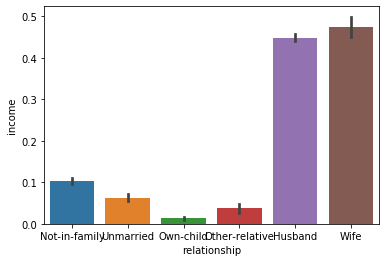

In [34]:
#Plotting relationship with income

sns.barplot(x='relationship',y='income',data=data)
plt.show()

Husband and wife is higly correlated with income

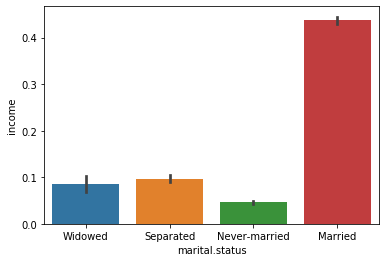

In [35]:
#Plotting marital.status with income

sns.barplot(x='marital.status',y='income',data=data)
plt.show()

Married is higly related with income

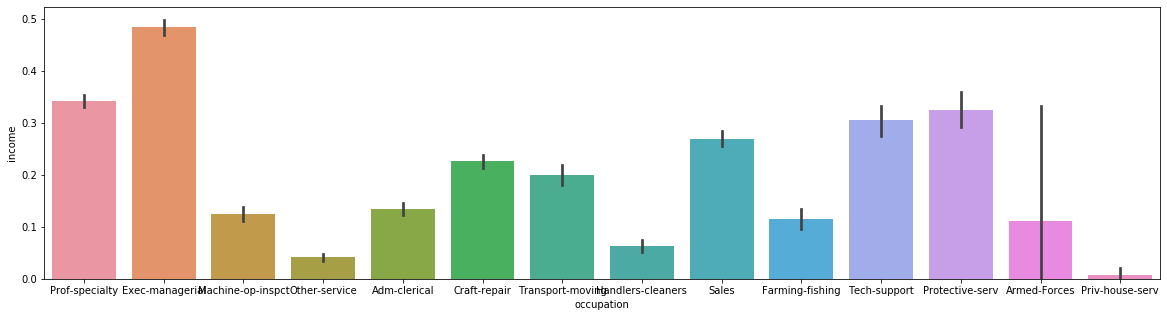

In [36]:
#Plotting education with income
plt.figure(figsize=(20,5))
sns.barplot(x='occupation',y='income',data=data)
plt.show()

#### Encoding the categorical features using LabelEncoder

In [37]:
collist = ['sex','workclass','education','marital.status','relationship','race','native.country','occupation']
le = LE()

for col in collist:
    data[col] = le.fit_transform(data[col])

In [38]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,2,77053,5,9,3,9,1,4,0,0,4356,40,38,0
1,82,2,132870,5,9,3,3,1,4,0,0,4356,18,38,0
2,66,2,186061,9,10,3,9,4,2,0,0,4356,40,38,0
3,54,2,140359,4,4,2,6,4,4,0,0,3900,40,38,0
4,41,2,264663,9,10,2,9,3,4,0,0,3900,40,38,0


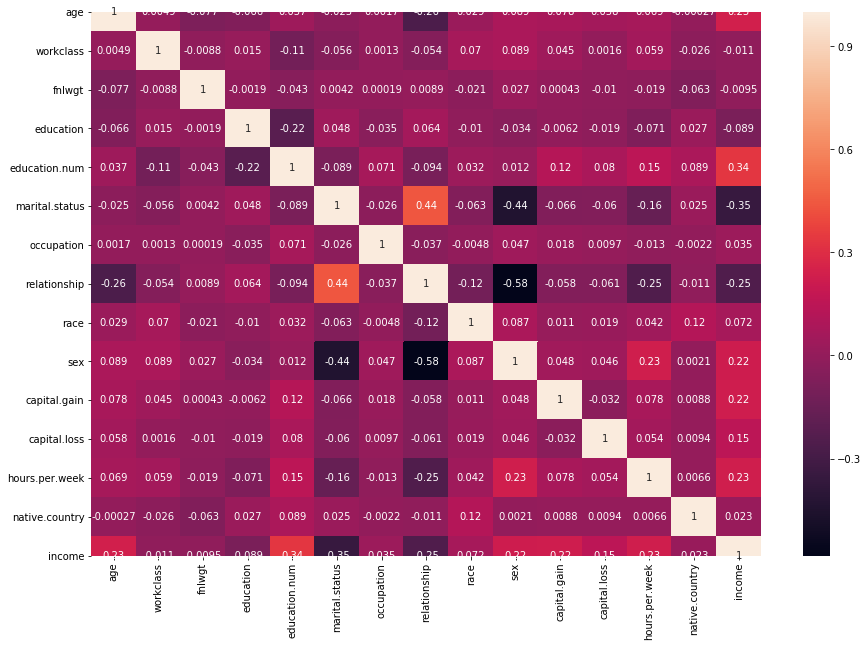

In [39]:
#Checking the correlation of dataset
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

From the above heatmap we can see that, income is highly postivily correlated with education.num

Income is highly negatively correlated with maritial.status

Income is moderate correlated with sex, capital.gain, capital.loss and  hours.per.week

In [40]:
#Describing dataset

data.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.845705,1.897784e+05,5.117195,10.080679,0.755444,6.138755,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.417155,0.240810
std,13.640433,0.790547,1.055500e+05,2.617631,2.572720,0.838816,3.972708,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,6.056047,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.178270e+05,3.000000,9.000000,0.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.783560e+05,5.000000,10.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,2.000000,2.370510e+05,6.000000,12.000000,1.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,4.000000,1.484705e+06,9.000000,16.000000,3.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


capital.gain and caital loss is having high standard deviation.

hours.per.week and age is having high difference in 75% and max.

age                  AxesSubplot(0.125,0.536818;0.0824468x0.343182)
workclass         AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
fnlwgt            AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
education         AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
education.num     AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
marital.status    AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
occupation        AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
relationship      AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
race                    AxesSubplot(0.125,0.125;0.0824468x0.343182)
sex                  AxesSubplot(0.223936,0.125;0.0824468x0.343182)
capital.gain         AxesSubplot(0.322872,0.125;0.0824468x0.343182)
capital.loss         AxesSubplot(0.421809,0.125;0.0824468x0.343182)
hours.per.week       AxesSubplot(0.520745,0.125;0.0824468x0.343182)
native.country       AxesSubplot(0.619681,0.125;0.0824468x0.343182)
income               AxesSubplot(0.718617,0.125;

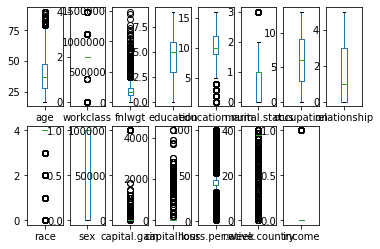

In [41]:
#Checking for outliers
#displaying box plot for outliers
data.plot(kind='box',subplots=True,layout=(2,8))

as we can see, oultliers are present in marital.status and capital gain

In [42]:
data.shape

(32561, 15)

In [43]:
#removing outliers present
from scipy.stats import zscore
z = np.abs(zscore(data))
data = data[(z<3).all(axis=1)]

In [44]:
data.shape

(27784, 15)

#### SPLITING DATA

In [45]:
x = data.drop(['income'],axis=1)
y = data.income

In [46]:
x.shape

(27784, 14)

In [47]:
y.shape

(27784,)

In [48]:
#checking skewness 

x.skew()

age                0.484817
workclass         -1.351518
fnlwgt             0.627875
education          0.044629
education.num     -0.146298
marital.status     0.750683
occupation         0.014262
relationship       0.753038
race              -2.587335
sex               -0.688898
capital.gain       4.930863
capital.loss      29.522010
hours.per.week    -0.359731
native.country    -5.407156
dtype: float64

In [49]:
#Removing skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [50]:
#Scaling data
#Using standard scaler 
ss=SS()
ss.fit(x)
x=ss.transform(x)

#### USING PCA

In [51]:
pca = PCA(n_components=10)

In [52]:
x = pca.fit_transform(x)

In [53]:
x = pd.DataFrame(data = x)

In [54]:
x

,0,1,2,3,4,5,6,7,8,9
0,1.617976,-4.097768,0.582675,9.994650,6.781297,22.655299,5.556707,5.110061,2.604347,-0.089932
1,-1.277821,-4.171632,0.759684,9.607757,5.848603,23.246898,5.690837,4.880705,2.553840,-0.110784
2,-0.830756,-2.620432,-0.029638,9.235472,4.641406,23.947994,3.702738,5.309358,3.703521,-1.016567
3,-0.332284,-1.056149,0.255012,8.645130,4.063958,24.381193,3.196299,5.670472,4.184001,-0.894987
4,3.265028,-2.431587,0.595273,9.161903,6.730359,22.165124,5.945809,5.913492,3.734957,0.478394
...,...,...,...,...,...,...,...,...,...,...
27779,0.351851,0.916096,0.222944,-1.351163,-0.655124,0.302719,0.170735,0.988175,1.247382,0.050729
27780,0.966217,-1.706556,1.221308,-1.551354,0.624995,0.276499,-0.976268,-0.019766,0.182758,-0.561280
27781,-1.401094,0.629335,-0.202207,-0.291188,-0.224618,0.235363,0.353290,-0.123165,-0.280318,-0.381331
27782,2.121322,-0.491823,-0.947027,1.750200,0.946010,-0.635944,-0.009771,-0.677801,-0.303260,-0.632555


### TRAIN TEST SPLIT

In [55]:
def best_model(model):
    i = 0
    max_accu_score = 0 #max accuracy score defining
    for r_state in range(42,101):
        train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
        model.fit(train_x,train_y)
        pred_y = model.predict(test_x)
        accu_score = accuracy_score(test_y,pred_y)
        accu_score = round(accu_score*100)
        if accu_score > max_accu_score:
            max_accu_score = accu_score
            final_r_state = r_state
    print("Max Accuracy Score Corresponding to random state ", final_r_state, " is ",max_accu_score)    
    return max_accu_score

In [56]:
#Instantiate the classifiers
clf_logreg = LoR()
clf_tree = DTC()
clf_knn =  KNN()
clf_forest = RandomForestClassifier()
clf_ada = AdaBoostClassifier()
clf_gnb = GNB()

In [57]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'RandomForest', 'Adaboost','Naive']

In [58]:
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN',
          clf_forest: 'RandomForest',
          clf_ada: 'Adaboost',
          clf_gnb: 'Naive'}

In [59]:
def main_fun(models):
    accuracy_scores = []
    for model,name in models.items():
        print("Checking accuracy score for",name)
        i = 0
        max_accu_score = 0 #max accuracy score defining
        for r_state in range(42,101):
            train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
            model.fit(train_x,train_y)
            pred_y = model.predict(test_x)
            accu_score = accuracy_score(test_y,pred_y)
            accu_score = round(accu_score*100)
            if accu_score > max_accu_score:
                max_accu_score = accu_score
                final_r_state = r_state
        print("Max Accuracy Score Corresponding to random state ", final_r_state, " is ",max_accu_score) 
        accuracy_scores.append(max_accu_score)
    return accuracy_scores

In [60]:
acc = main_fun(models)

Checking accuracy score for LogisticRegression
Max Accuracy Score Corresponding to random state  45  is  84.0
Checking accuracy score for DecisionTree
Max Accuracy Score Corresponding to random state  47  is  79.0
Checking accuracy score for KNN
Max Accuracy Score Corresponding to random state  42  is  83.0
Checking accuracy score for RandomForest
Max Accuracy Score Corresponding to random state  42  is  83.0
Checking accuracy score for Adaboost
Max Accuracy Score Corresponding to random state  99  is  84.0
Checking accuracy score for Naive
Max Accuracy Score Corresponding to random state  42  is  83.0


In [61]:
acc

[84.0, 79.0, 83.0, 83.0, 84.0, 83.0]

In [62]:

pd.DataFrame(acc,columns = ['Accuracy Scores'],index = classifiers).sort_values(by = 'Accuracy Scores',ascending = False)

,Accuracy Scores
LogisticRegression,84.0
Adaboost,84.0
KNN,83.0
RandomForest,83.0
Naive,83.0
DecisionTree,79.0


In [63]:
accuracyScore = acc
algoName = classifiers

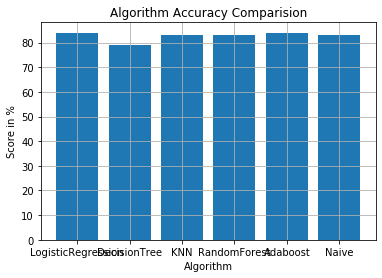

In [64]:
plt.bar(algoName, accuracyScore)
plt.grid()
plt.title('Algorithm Accuracy Comparision')
plt.xlabel('Algorithm')
plt.ylabel('Score in %')
plt.show()

FROM THE ABOVE ALL OBSERVATION WE ARE CONCLUDING WITH LOGISTIC REGRESSION AS IT GAVES US HIGHEST ACCURACY SCORE. SO WE ARE SAVING LOGISTIC REGRESSION TO SAVE OUR FINAL MODEL.

In [65]:
#Logistic Regression gave max score for random state = 45
lor = LoR()
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=45)
lor.fit(train_x,train_y)
pred_y = lor.predict(test_x)
accuracy_score = accuracy_score(test_y,pred_y)
accuracy_score = round((accuracy_score)*(100))
print("Accuracy score is : ", accuracy_score)
print("Confusion matrix is")
print()
print(confusion_matrix(test_y,pred_y))
print("Classification report ")
print()
print(classification_report(test_y,pred_y))

Accuracy score is :  84.0
Confusion matrix is

[[4062  247]
 [ 657  591]]
Classification report 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4309
           1       0.71      0.47      0.57      1248

    accuracy                           0.84      5557
   macro avg       0.78      0.71      0.73      5557
weighted avg       0.83      0.84      0.83      5557



### SAVING MODEL

In [66]:
joblib.dump(lor, 'Project_11_Census_Income.pkl')

['Project_11_Census_Income.pkl']

### CONCLUSION

In this model, I've used new approach to overcome missing values, and also I've used some EDA techniques to visualize the data.

Also used Principal Component Analysis – the most popular dimensionality reduction technique.

I have demonstrated PCA implementation with 10 column.

I have used new approach to get accuracy score for all models in one go by taking it into a list and looping.

Also I've used a new way to represent all models accuracy score in a bar.

At last I've got best accuracy score of 84 for Logistic Regression and saved that model for future prediction.

Note: SVC was not giving a result, it was getting stucked for more time.